<h1> Lending club Case study</h1>
-To Define factors or pattern that will incline to applicant as "Defaulter" will help the risk area of the loan approval process<br>
-Pattern about taking action against the risk of loan approval like denying loan, reducing ammountof loan etc.
    

In [8]:
#Importing required libraries
# Libararies for Data Operations
import numpy as np
import pandas as pd
# Liberaries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

#### Using Dataset provided contains the complete loan data for all loans issued through the time period 2007 - 2011.

In [10]:
# read the data
loan_df = pd.read_csv("loan.csv",dtype=object)

In [11]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [13]:
loan_df.shape

(39717, 111)

### To provide solution to this business problem ,followed step by step EDA process

# Step 1:Data Cleaning 

### Removing all null records

In [16]:
#As multiple columns have missing values and null values
#Data Cleanup of NULLs from rows and columns of the loan dataframe
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [17]:
#number of columns have missing values
print('Number of columns having all values as null:')
print(loan_df.isnull().all(axis=0).sum())

Number of columns having all values as null:
0


In [18]:
loan_df.isnull().sum()
# Removing column which has all null values
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [19]:
# The dataset has single values in 53 to 105 index of columns
loan_df.drop(loan_df.iloc[:,53:105],inplace=True,axis=1)

In [20]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,39717,39717,39646,39717,1140,39715,39661,39717,39717,39717
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,4040,2616,101,34930,2,106,1,1,1,1
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,0,0,May-16,0,Jun-16,May-16,0,1,INDIVIDUAL,0
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,35499,35935,1256,74,1125,10308,39661,39717,39717,39717


In [21]:
# Finding out columns which have all null values

loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [22]:
loan_df.shape

(39717, 53)

## Remving Column which has not significant effect on the anlaysis of 'Defaulter' lon applications

In [23]:
# As per our purpose tof find defaulters from data the values for personal information not required
col_drop_l=["member_id","url","emp_title","zip_code","last_credit_pull_d","addr_state","title"]
loan_df.drop(labels=col_drop_l,axis=1,inplace=True)

In [24]:
col_drop_l1=["desc","out_prncp_inv","total_pymnt_inv","funded_amnt"]
loan_df.drop(labels=col_drop_l1,axis=1,inplace=True)

In [25]:
loan_df.shape

(39717, 42)

In [26]:
#Gives information after the loan approved
col_drop_l2=["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp",
              "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
              "last_pymnt_d","last_pymnt_amnt", "next_pymnt_d" ,
              "mths_since_last_delinq", "mths_since_last_record"]
loan_df.drop(col_drop_l2, axis = 1, inplace = True)
loan_df.shape

(39717, 28)

In [27]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq'],
      dtype='object')

# Removing single vlaued columns

In [28]:
loan_df['pymnt_plan'].value_counts()
loan_df['initial_list_status'].value_counts()
loan_df['collections_12_mths_ex_med'].value_counts()
loan_df['policy_code'].value_counts()
loan_df['acc_now_delinq'].value_counts()
loan_df['application_type'].value_counts()


loan_df.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq',
                'application_type'], axis = 1, inplace = True)
loan_df.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,1077501,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,1,Apr-99,5,3,0,9.40%,4
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,20,Feb-96,1,10,0,21%,37
4,1075358,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


# After initial analysis of data on csv file, that applicants loan status =Current is payingthe loan to anlayse the defaulter factors this data is unrequired

In [29]:
#removing the current loan status values from df
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [30]:
#Missiing values
(loan_df.isna().sum()/len(loan_df.index))*100

id                     0.000000
loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [31]:
loan_df.shape

(38577, 22)

In [32]:
loan_df.emp_length.unique

<bound method Series.unique of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object>

# As emp_length,int_rate is required column but has values which cannont be used for operations so upadtaing the each value for analysis

In [33]:
loan_df.emp_length=loan_df.emp_length.astype("str")

In [34]:
loan_df.emp_length=loan_df.emp_length.apply(lambda x:x.replace("years",""))
loan_df.emp_length=loan_df.emp_length.apply(lambda x:x.replace("year",""))
loan_df.emp_length=loan_df.emp_length.apply(lambda x:x.replace("10+","11"))
loan_df.emp_length=loan_df.emp_length.apply(lambda x:x.replace("< 1","0"))

In [35]:
loan_df.dropna(axis = 0, subset = ['emp_length'] , inplace = True)
loan_df.emp_length.isna().sum()

0

In [36]:
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : x.split('%')[0]))

In [37]:
loan_df.int_rate.unique

<bound method Series.unique of 0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64>

# Outlier Check for sigificant numeric factors

<Axes: >

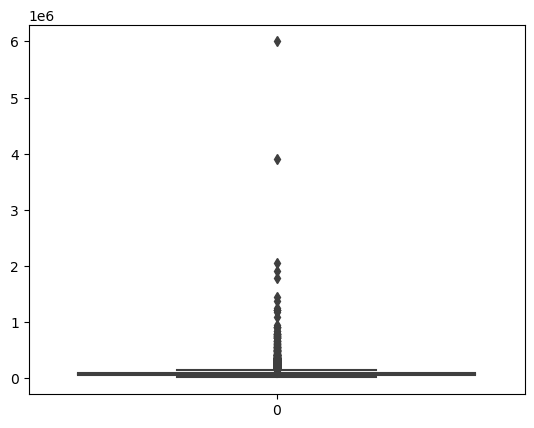

In [38]:
#Bumeric values and checking outliers
sns.boxplot(loan_df['annual_inc'])

## As above boxplot shows data in outlier,considering only 95 percentile and remoing the oulier rows for analysis

In [40]:
loan_df.annual_inc.astype("float64")

0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38577, dtype: float64

In [41]:
loan_df.annual_inc = pd.to_numeric(loan_df.annual_inc)

In [43]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<Axes: >

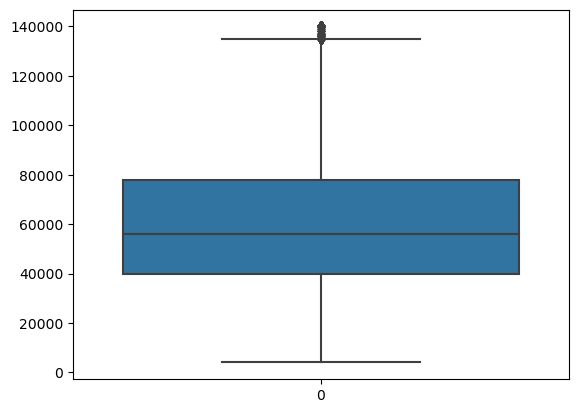

In [44]:
sns.boxplot(loan_data.annual_inc)

<Axes: >

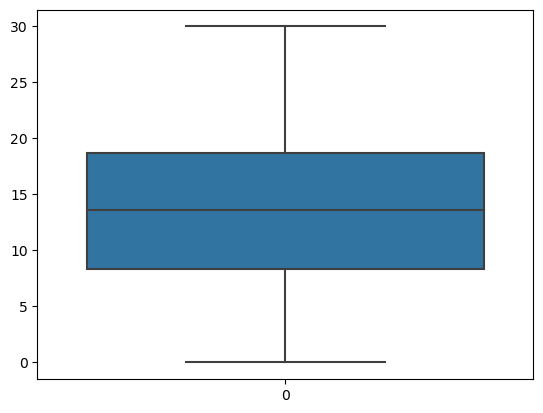

In [45]:
sns.boxplot(loan_data.dti)

<Axes: >

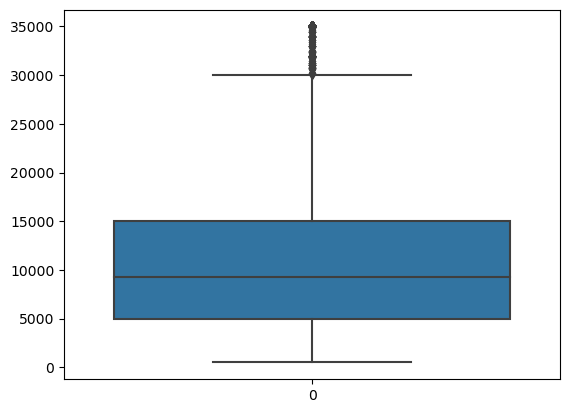

In [46]:
sns.boxplot(loan_data.loan_amnt)

In [47]:
loan_df.loan_amnt = pd.to_numeric(loan_df.loan_amnt)
loan_df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

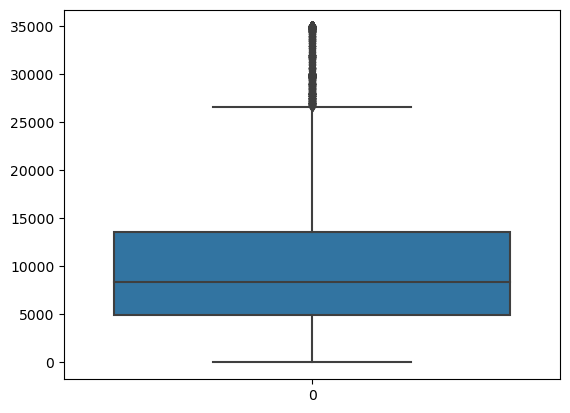

In [48]:
sns.boxplot(loan_data.funded_amnt_inv)

In [49]:
loan_df.funded_amnt_inv = pd.to_numeric(loan_df.funded_amnt_inv)
loan_df.funded_amnt_inv.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

### As outlier check no other variabe has found ,hence procedding to analysis

<h1> Univeriate Analaysis

#### 1 Loan status

<Axes: xlabel='loan_status', ylabel='count'>

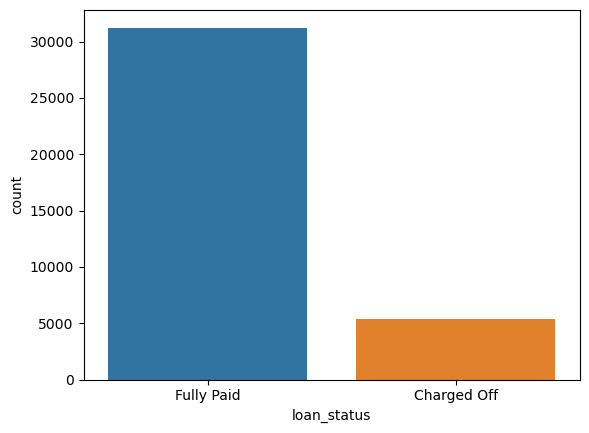

In [50]:
sns.countplot(x = 'loan_status', data = loan_df)

#### 2 Loan Purpose

<Axes: xlabel='count', ylabel='purpose'>

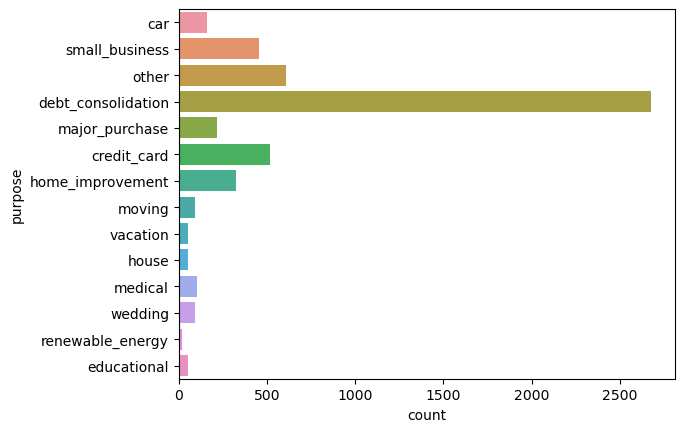

In [51]:
sns.countplot(y = 'purpose', data = loan_df[loan_df.loan_status == 'Charged Off'])

#### 3 Grade

<Axes: xlabel='grade', ylabel='count'>

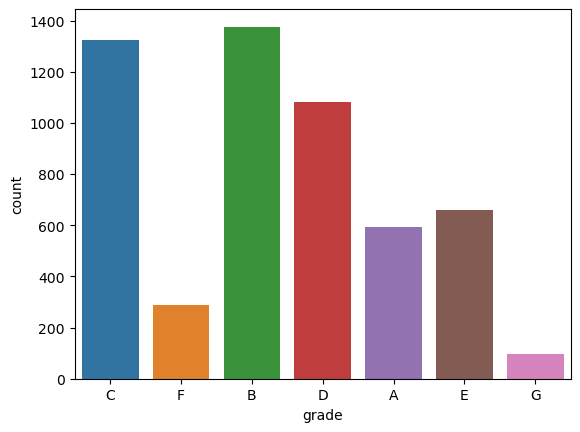

In [52]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'])

#### 4 Grade and Sub-grades

In [53]:
loan_df.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

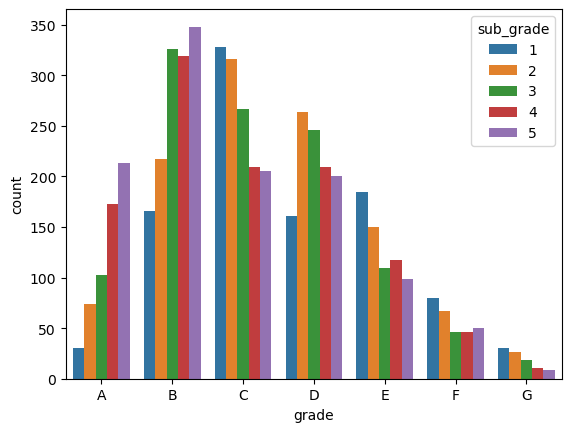

In [54]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

## Derived Columns

#### 5 Loan issue year -Derived Column ('issue_year') from column ('issue_d')

In [55]:
import datetime
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loan_df = loan_df.reset_index(drop=True)
#loan_df['issue_year']
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
loan_df['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
36649    2007
36650    2007
36651    2007
36652    2007
36653    2007
Name: issue_year, Length: 36654, dtype: int64

<Axes: xlabel='issue_year', ylabel='count'>

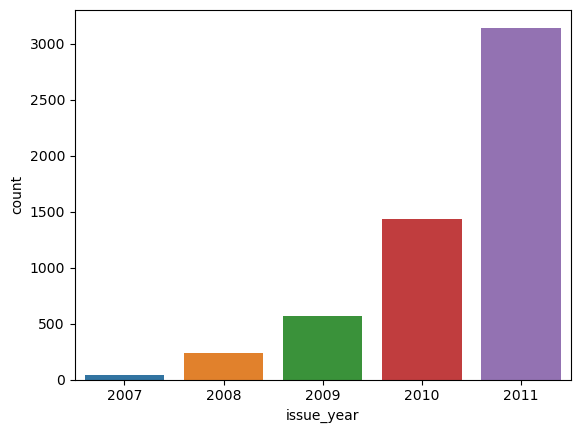

In [56]:
sns.countplot(x = 'issue_year', data = loan_df[loan_df.loan_status == 'Charged Off'])

#### 6 dti_range -SEgmented the Dti column and categorised as low medium and high and drived new column dti_range

In [57]:
def dti_calculator(dti):
    if dti <= 10.00:
        return 'LOW'
    elif (dti >10.00 and dti <= 20.00):
        return 'MEDIUM'
    else:
        return 'HIGH'

In [58]:
loan_df['dti']=pd.to_numeric(loan_df['dti'])
loan_df['dti_range'] = loan_df['dti'].apply(lambda x : dti_calculator(x))

<Axes: xlabel='dti_range', ylabel='count'>

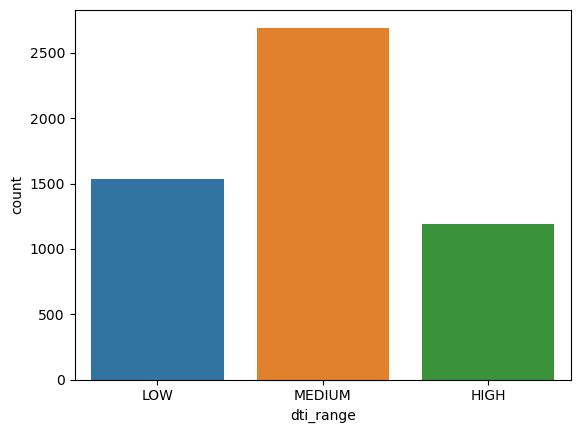

In [59]:
sns.countplot(x = 'dti_range', data = loan_df[loan_df.loan_status == 'Charged Off'])

In [60]:
def exp_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Superior'

In [61]:
#loan_df['emp_length']=pd.to_numeric(loan_df['emp_length'])
#loan_df['exp_level'] = loan_df['emp_length'].apply(lambda x : exp_level(int(x)))
loan_df['emp_length'].unique


<bound method Series.unique of 0        11 
1         0 
2        11 
3        11 
4         3 
        ... 
36649     5 
36650     4 
36651     3 
36652     0 
36653     0 
Name: emp_length, Length: 36654, dtype: object>

In [62]:
#Extracting integer from String
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))
#Filtering the rows where experience is NA
loan_df = loan_df[loan_df['emp_length']!='']
loan_df['exp_level'] = loan_df['emp_length'].apply(lambda x : exp_level(int(x)))

<Axes: xlabel='exp_level', ylabel='count'>

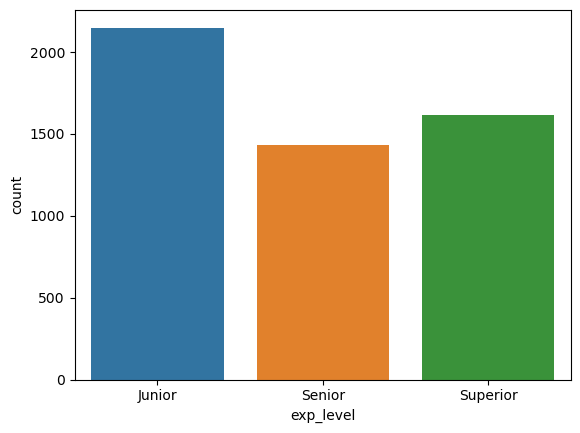

In [63]:
sns.countplot(x = 'exp_level', data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='term', ylabel='count'>

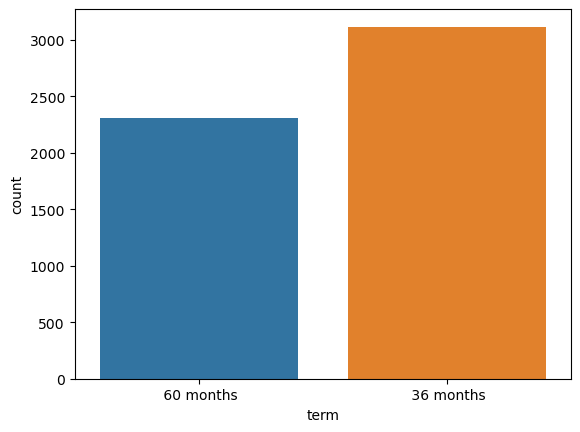

In [64]:
sns.countplot(x='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [65]:
#checking unique values for home_ownership
loan_df['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [66]:
#replacing 'NONE' with 'OTHERS'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

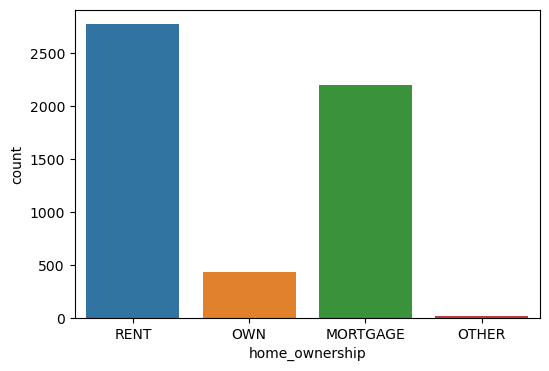

In [67]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

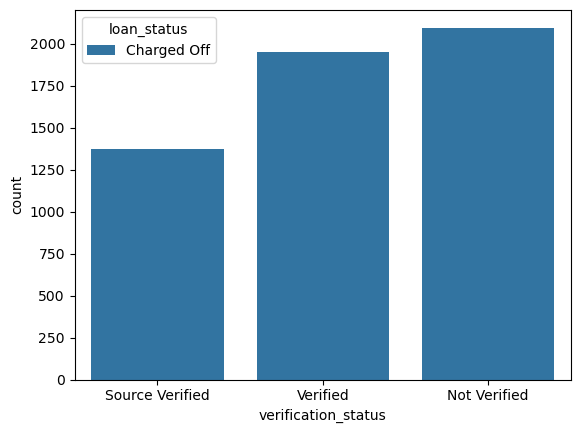

In [68]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'],hue ='loan_status')

# Bivariate Analaysis

### 1 Experiance level and Loan status

<Axes: xlabel='loan_status', ylabel='count'>

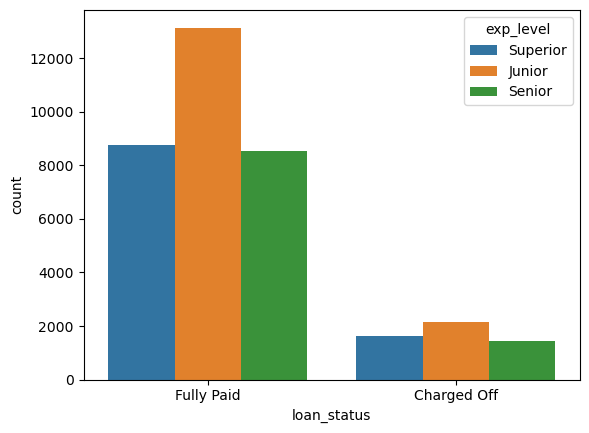

In [69]:
sns.countplot(x = 'loan_status', hue = 'exp_level',
              data = loan_df[loan_df.loan_status != 'Current'])

### 2 DTI range and Loan status

<Axes: xlabel='loan_status', ylabel='count'>

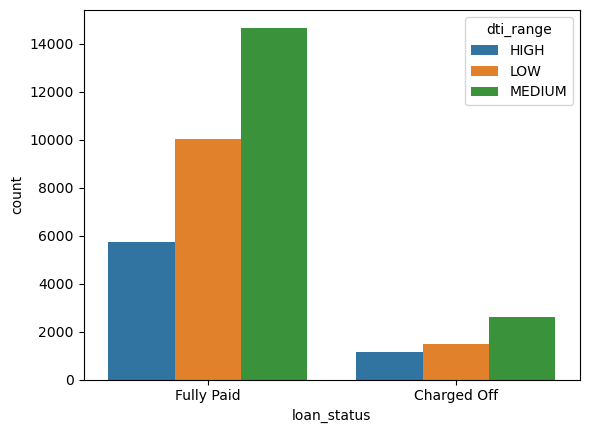

In [70]:
sns.countplot(x = 'loan_status', hue = 'dti_range',
              data = loan_df[loan_df.loan_status != 'Current'])

### 3 Annual income and purpose

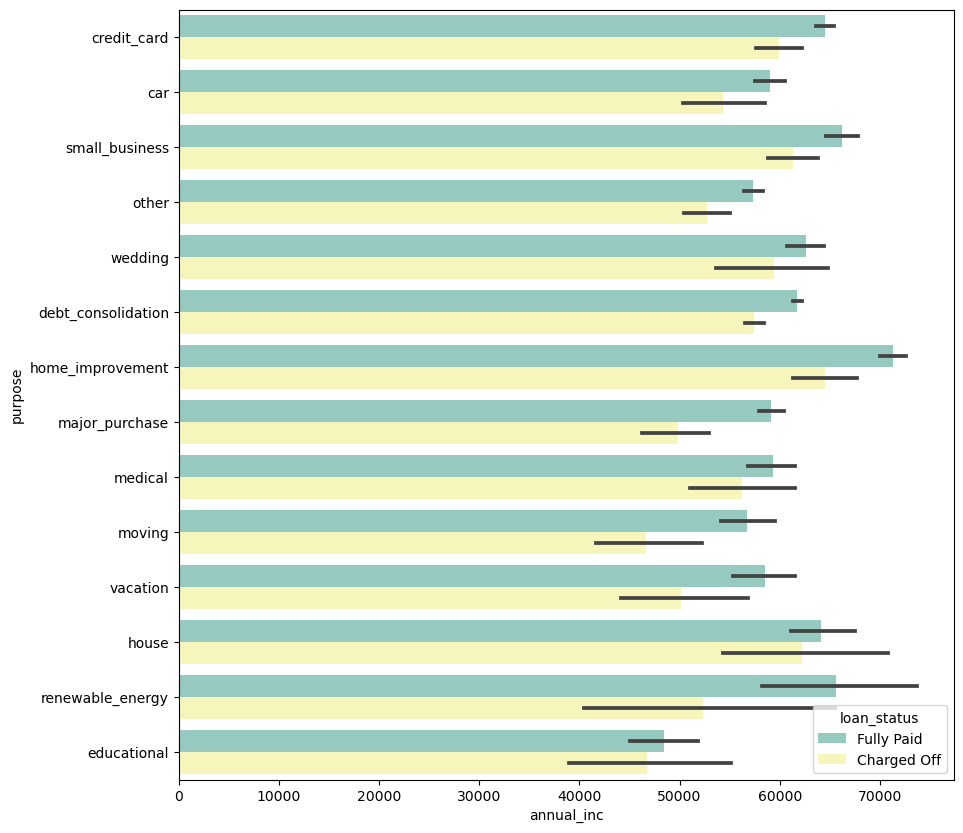

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df[loan_df.loan_status!='Current'],x='annual_inc', y='purpose', hue ='loan_status',palette="Set3")
plt.show()

### 4 Annual income and Home Ownership

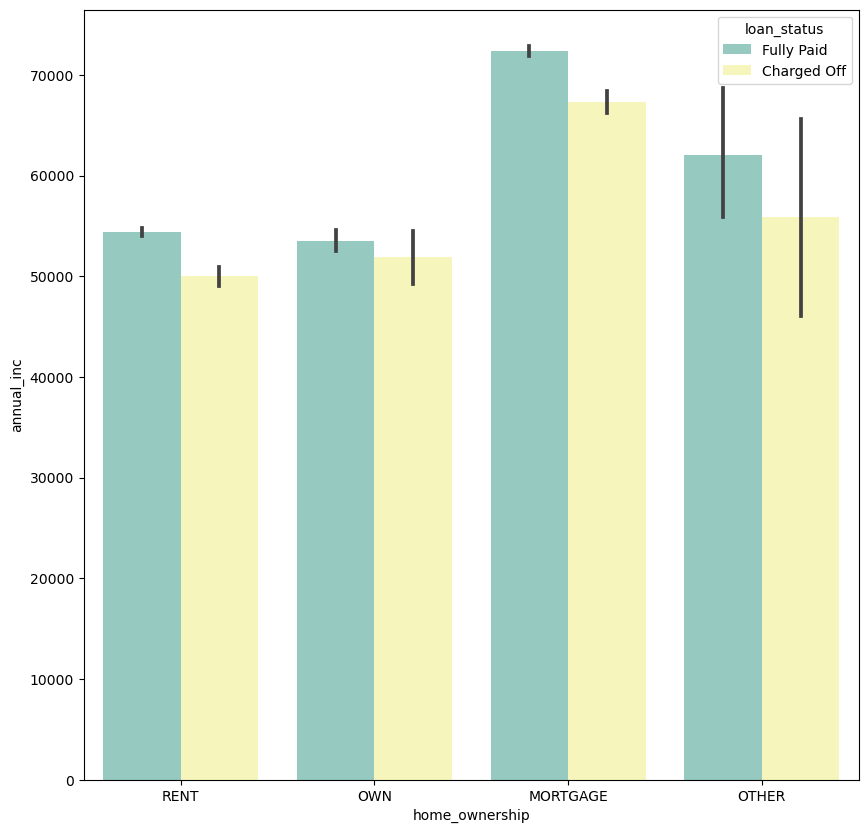

In [73]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df[loan_df.loan_status!='Current'],x='home_ownership', y='annual_inc', hue ='loan_status',palette="Set3")
plt.show()

## Binning the countinous data

#### Derived bins for data coulns are:
#### 1 inetrates rate group by 5%-9%','9%-13%','13%-17%','17%-21%','21%-24%.
#### 2 Annual income group by '3k-31k','31k-58k','58k-85k','85k-112k','112k-140k.

In [75]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])


## 5 Interatest rate groups and Loan ammount

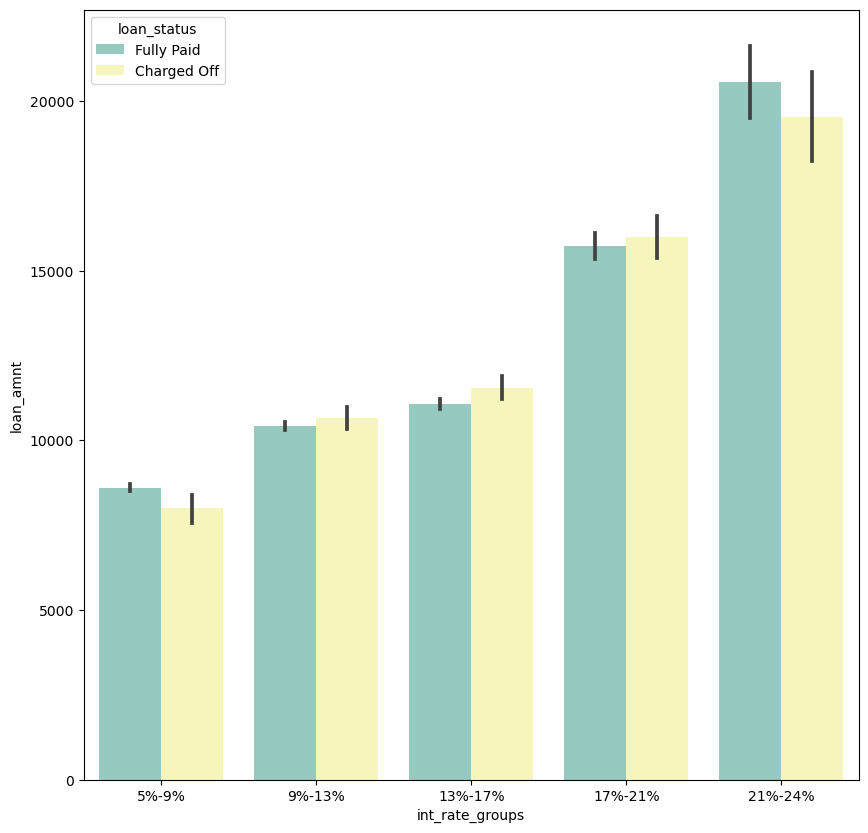

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df[loan_df.loan_status!='Current'],x='int_rate_groups', y='loan_amnt', hue ='loan_status',palette="Set3")
plt.show()

## 6 Term and Loan ammount

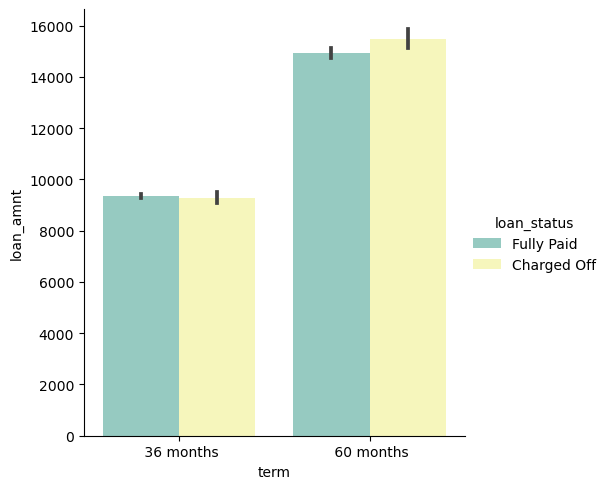

In [77]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_df,hue = 'loan_status', kind = 'bar',palette="Set3")

## 7 Interest rate and Grade

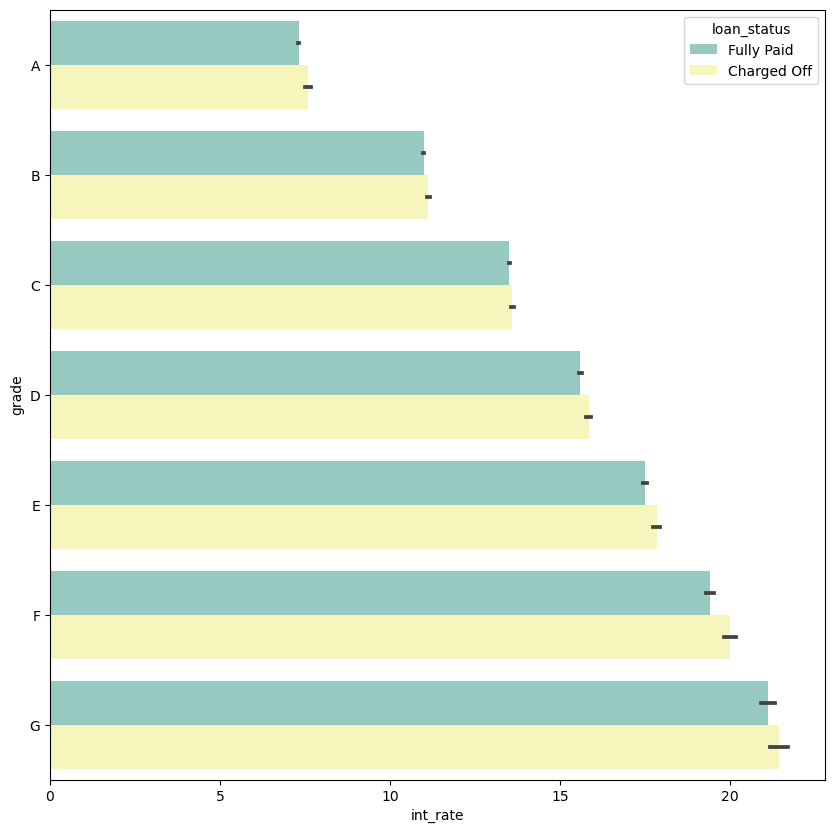

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="Set3", order=['A','B','C','D','E','F','G'],)
plt.show()

## 8 Loan ammount amd Experience level

<Axes: xlabel='exp_level', ylabel='loan_amnt'>

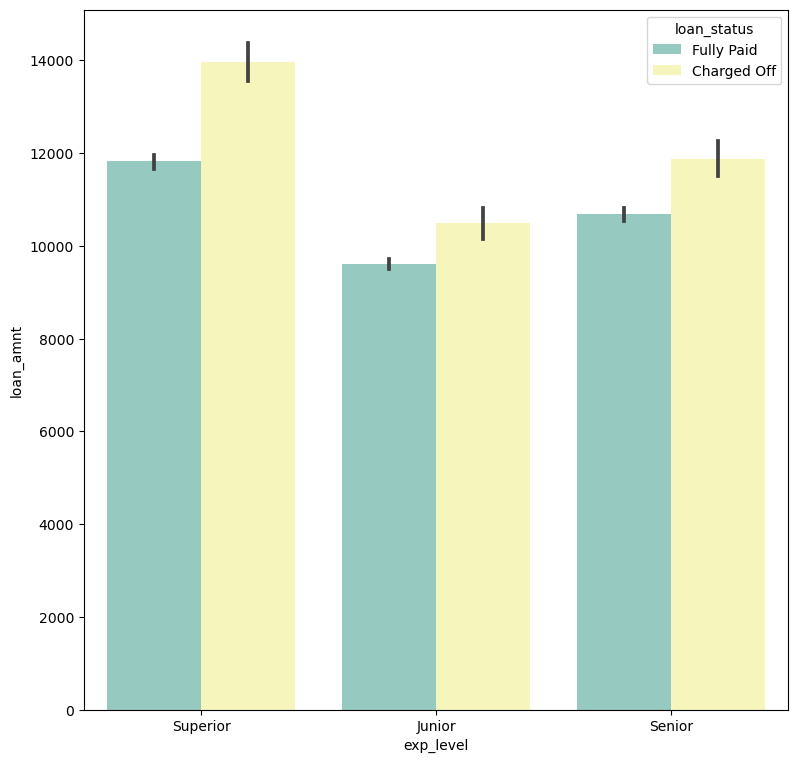

In [80]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='exp_level', hue ='loan_status',palette="Set3")

## 9 Loan ammount and Verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

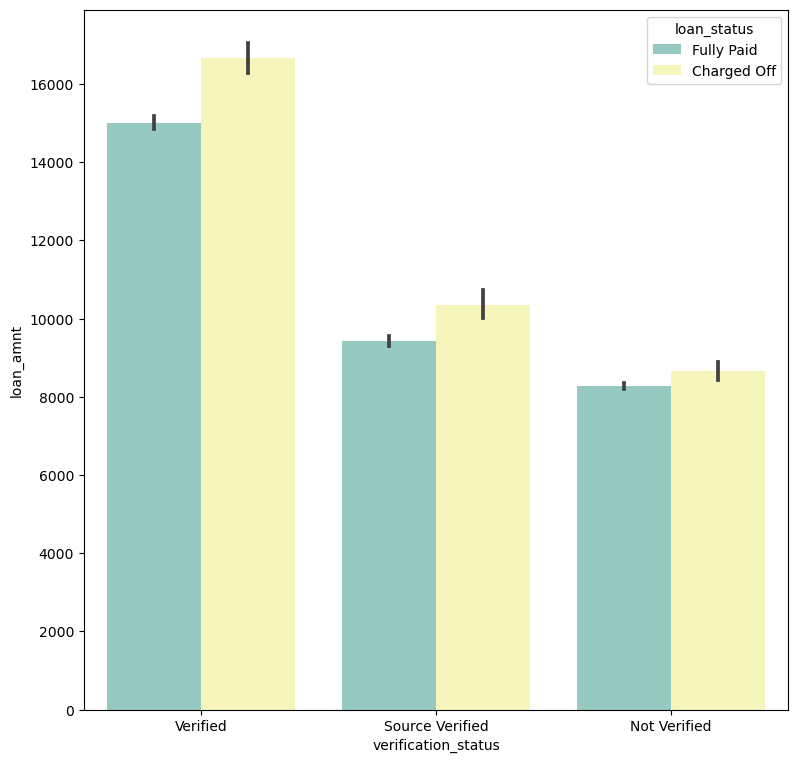

In [82]:
plt.figure(figsize=(20,20))
plt.subplot(222)
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="Set3")

# Multi-Variate Analaysis

In [83]:
# Filtering all the numerical values to understand their correlation
laons_corr_df = loan_df.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti
loan_amnt,1.000,0.936,0.931,0.151,0.400,0.090
funded_amnt_inv,0.936,1.000,0.901,0.162,0.379,0.097
installment,0.931,0.901,1.000,0.122,0.394,0.079
emp_length,0.151,0.162,0.122,1.000,0.197,0.057
annual_inc,0.400,0.379,0.394,0.197,1.000,-0.077
dti,0.090,0.097,0.079,0.057,-0.077,1.000


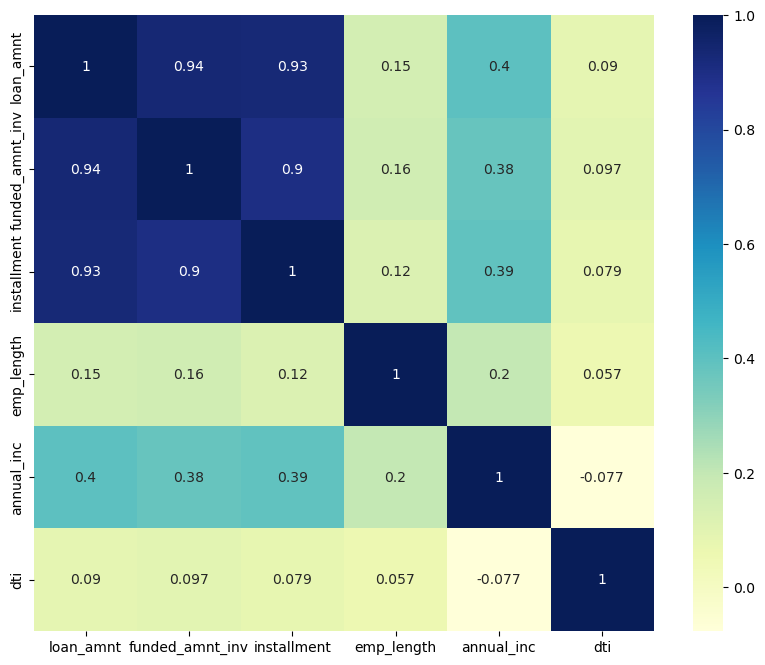

In [84]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()